In [12]:
%matplotlib widget
import warnings
import fnmatch
import os
#import ccdproc
from ccdproc import Combiner, combine, subtract_bias, subtract_dark
from astropy.utils.exceptions import AstropyWarning
from time import gmtime, strftime
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table
from astropy import units as u

from astropy.nddata import CCDData, StdDevUncertainty
from specutils import Spectrum1D
import ccdproc
from astropy.stats import mad_std
from ccdproc import trim_image, Combiner
from astropy.io import fits
from time import gmtime, strftime

warnings.simplefilter('ignore', category=AstropyWarning)

dir = 'e:/Astro/Captures/20231008_Void/'
bias_files = [dir + f for f in fnmatch.filter(os.listdir(dir), 'Bias*')]
dark_files = [dir + f for f in fnmatch.filter(os.listdir(dir), 'dark*')]
flat_files = [dir + f for f in fnmatch.filter(os.listdir(dir), 'flat*')]
sci_files  = [dir + f for f in fnmatch.filter(os.listdir(dir), 'deneb*')]

bias_header = fits.open(bias_files[0])[0].header
dark_header = fits.open(dark_files[0])[0].header
flat_header = fits.open(flat_files[0])[0].header
sci_header = fits.open(sci_files[0])[0].header

print ('bias combine...')
from datetime import datetime; print(datetime.now())
bias_list = [CCDData.read(f, unit = u.adu) for f in bias_files]
bias_master = ccdproc.combine(bias_list, method='median', mem_limit = 1e9)
bias_master.data = bias_master.data.astype('float32')
bias_master.meta['combined'] = True
print('bias_master', str(bias_master.dtype))
bias_master.write(dir + 'masterbias.fit', overwrite=True)
bias_list = None
#out_file = fits.PrimaryHDU(bias_master.data, bias_header)
#out_hdr = out_file.header
#out_hdr['DATE'] = strftime("%Y-%m-%dT%H:%M:%S", gmtime())
#out_hdr['history'] = 'numpy.median combined'
#out_file.writeto(dir + 'masterbias.fit', overwrite = True)

from datetime import datetime; print(datetime.now())
darks_list = []
for dark_file in dark_files:
    dark_data = CCDData.read(dark_file, unit = u.adu)
    dark_sub = ccdproc.subtract_bias(dark_data, bias_master)
    dark_sub.data = dark_sub.data.astype('float32')
    dark_data = None
    print('dark_sub', dark_file, str(dark_sub.dtype))
    darks_list.append(dark_sub)

print ('dark combine...')
dark_master = ccdproc.combine(darks_list, method='median', mem_limit = 1e9)
dark_master.data = dark_master.data.astype('float32')
print('dark_master', str(dark_master.dtype))
dark_master.meta['combined'] = True
dark_master.write(dir + 'masterdark.fit', overwrite=True)
darks_list = None

from datetime import datetime; print(datetime.now())
flats_list = []
for flat_file in flat_files:
    flat_data = CCDData.read(flat_file, unit = u.adu)
    flat_sub = ccdproc.subtract_bias(flat_data, bias_master)
    flat_sub.data = flat_sub.data.astype('float32')
    flat_data = None
    print('flat_sub', flat_file, str(flat_sub.dtype))
    flats_list.append(flat_sub)

print ('flat combine...')
flat_master = ccdproc.combine(flats_list, method='median', mem_limit = 1e9)
flat_master.data = flat_master.data.astype('float32')
flat_master.meta['combined'] = True
flat_master.write(dir + 'masterflat.fit', overwrite=True)
flats_list = None

from datetime import datetime; print(datetime.now())
sci_list = []
for sci_file in sci_files:
    sci_data = CCDData.read(sci_file, unit = u.adu)
    sci_sub1 = ccdproc.subtract_bias(sci_data, bias_master)
    sci_sub2 = ccdproc.subtract_dark(sci_sub1, dark_master, exposure_unit=u.second, scale = True, dark_exposure = 300.0*u.second, data_exposure = 200.0*u.second)   
    sci_sub3 = ccdproc.flat_correct(sci_sub2, flat_master, min_value=0.9)   
    sci_sub3.data = sci_sub3.data.astype('float32')
    sci_data = None
    print('sci_sub', sci_file, str(sci_sub3.dtype))
    sci_list.append(sci_sub3)

print ('sci combine...')
sci_master = ccdproc.combine(sci_list, method='sum', mem_limit = 1e9)
sci_master.data = sci_master.data.astype('float32')
sci_master.meta['combined'] = True
sci_master.write(dir + 'mastersci.fit', overwrite=True)
sci_list = None

"""
darkhdr = darklist[0].header 
inexp = float(inhdr['EXPTIME'])
darkexp = float(darkhdr['EXPTIME'])
darkscale = inexp/darkexp
outimage = (inimage -inbias) - darkscale * (indark -inbias)
"""

bias_list = None
darks_list = None
flats_list = None
sci_list = None

bias_master = None
dark_master = None
flat_master = None
sci_master = None

bias_header = None
flat_header = None
dark_header = None
sci_header = None


bias combine...
2024-02-13 11:55:34.211941
INFO: splitting each image into 21 chunks to limit memory usage to 1000000000.0 bytes. [ccdproc.combiner]
bias_master float32
2024-02-13 11:56:56.302141
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-1.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-10.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-11.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-12.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-13.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-14.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-15.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-2.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-3.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-4.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-5.fit float32
dark_sub e:/Astro/Captures/20231008_Void/Dark-300s-6.fit float32
dark_sub e:/Astro/

In [10]:
bias_list = None
darks_list = None
flats_list = None
sci_list = None

bias_master = None
dark_master = None
flat_master = None
sci_master = None

bias_header = None
flat_header = None
dark_header = None
sci_header = None

In [2]:
from astropy.io import fits
from time import gmtime, strftime

def fits_combine(images_list: list[str], operation, outfile: str) -> np:
    images = [fits.open(f)[0].data for f in images_list]
    headers = [fits.open(f)[0].header for f in images_list]
    new_image = operation(images, axis=0)
    out_file = fits.PrimaryHDU(new_image.astype(np.float32), headers[0])
    out_hdr = out_file.header
    out_hdr['DATE'] = strftime("%Y-%m-%dT%H:%M:%S", gmtime())
    out_hdr['history'] = '{} of {} images'.format(str(operation), len(images_list))
    out_file.writeto(outfile, overwrite = True)
    images = None
    return (new_image)

def combine_fits(files_data: list[np], operation, outfile: str) -> None:
    img_array = []
    hdu_array = []
    nb_images = 0
   
    median_array = operation(img_array, axis=0)
    out_file = fits.PrimaryHDU(median_array, hdu_array[0])
    out_hdr = out_file.header
    out_hdr['DATE'] = strftime("%Y-%m-%d %H:%M:%S", gmtime())
    out_hdr['history'] = 'Median of %d images by numpy.median' %(nb_images,)
    out_hdr['history'] = 'First image '+  files[0]
    out_hdr['history'] = 'Last image  '+  files[nb_images - 1]
    out_file.writeto(outfile, overwrite = True)


In [ ]:
"""
inhdr = inlist[0].header
darkhdr = darklist[0].header 
inexp = float(inhdr['EXPTIME'])
darkexp = float(darkhdr['EXPTIME'])
darkscale = inexp/darkexp


# Create a dark-subtracted image

outimage = (inimage -inbias) - darkscale * (indark -inbias)

combine_fits(bias_files, np.median, dir + 'masterbias.fit')

darks_list = []
masterbias = CCDData.read(dir + 'masterbias.fit', unit = u.adu)
for dark in darkfiles:
    dark = CCDData.read(dark, unit = u.adu)
    dark_sub = ccdp.subtract_bias(dark, masterbias)
    darks_list.append(dark_sub)

dark_sub_file = ccdproc.combine(blue_flat_list, method='median')
dark_sub_file.write('master_flat_blue.fits', clobber=True)



combine_fits(biasfiles, np.median, dir + 'masterdark.fit')
"""

In [14]:
sci_data = CCDData.read(dir + 'mastersci.fit', unit = u.adu)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


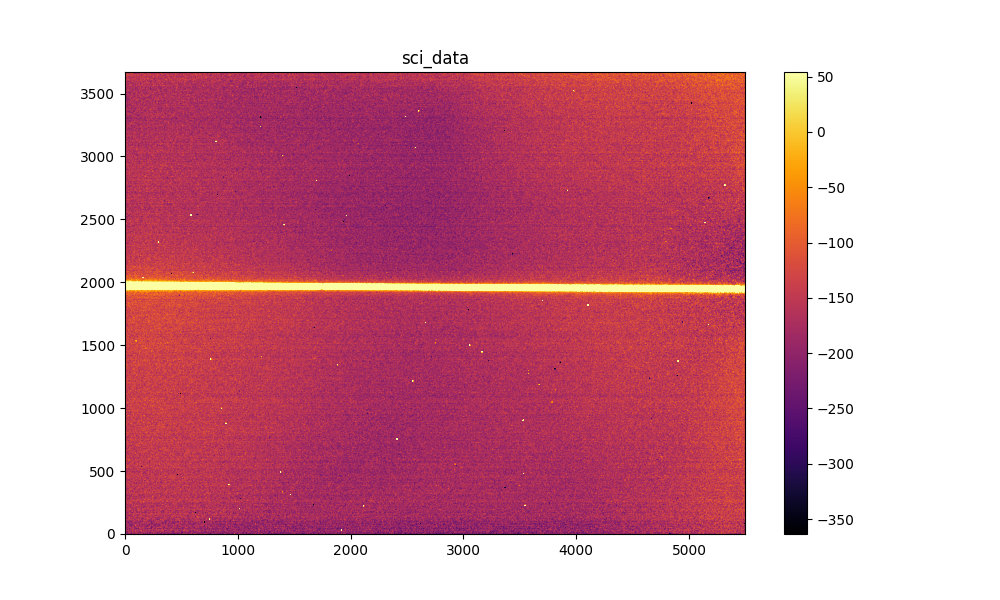

In [23]:
plt.figure(figsize=(10,6))
plt.imshow(sci_data, origin='lower', aspect='auto', cmap=plt.cm.inferno)
plt.title('sci_data')
plt.clim(np.percentile(sci_data, (10, 90)))
cb = plt.colorbar()

In [24]:
from specreduce import tracing, background, extract
sci_tr = tracing.FitTrace(sci_data,  peak_method='max')   #FitTrace(image, peak_method='gaussian', guess=trace_pos)
bg = background.Background.two_sided(sci_data, sci_tr, separation=50, width=20) 
extract = extract.BoxcarExtract(sci_data - bg, sci_tr, width = 10)
spectrum = extract()


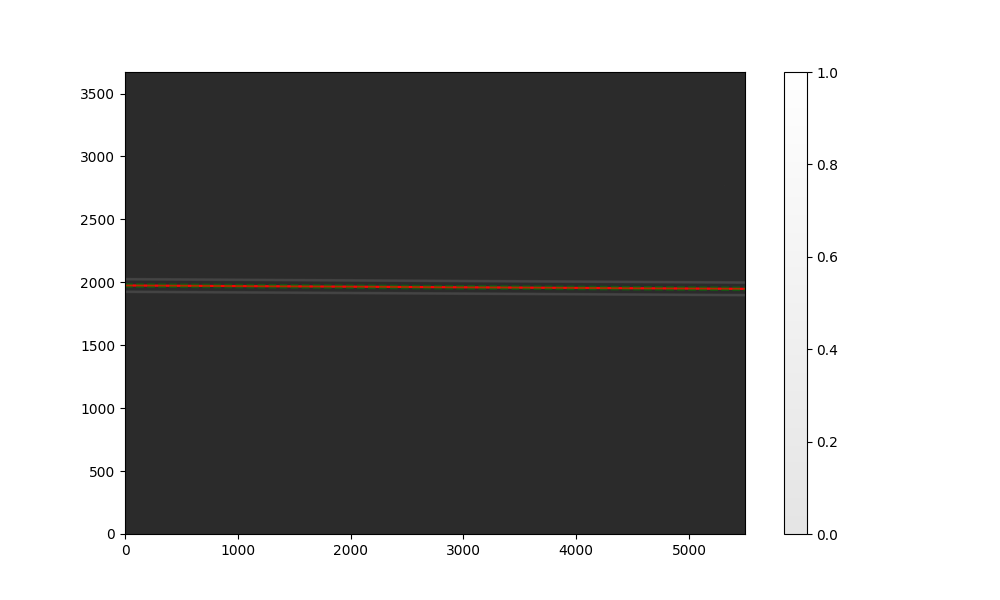

In [30]:
plt.figure(figsize=(10,6))
plt.imshow(sci_data, origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.imshow(bg.bkg_wimage, origin='lower', aspect='auto', cmap=plt.cm.gray, alpha=0.1)
plt.plot(sci_tr.trace , color='r')
plt.plot(sci_tr.trace+extract.width , color='g', linestyle='dashed', alpha=0.5)
plt.plot(sci_tr.trace-extract.width , color='g', linestyle='dashed', alpha=0.5)

cb = plt.colorbar()



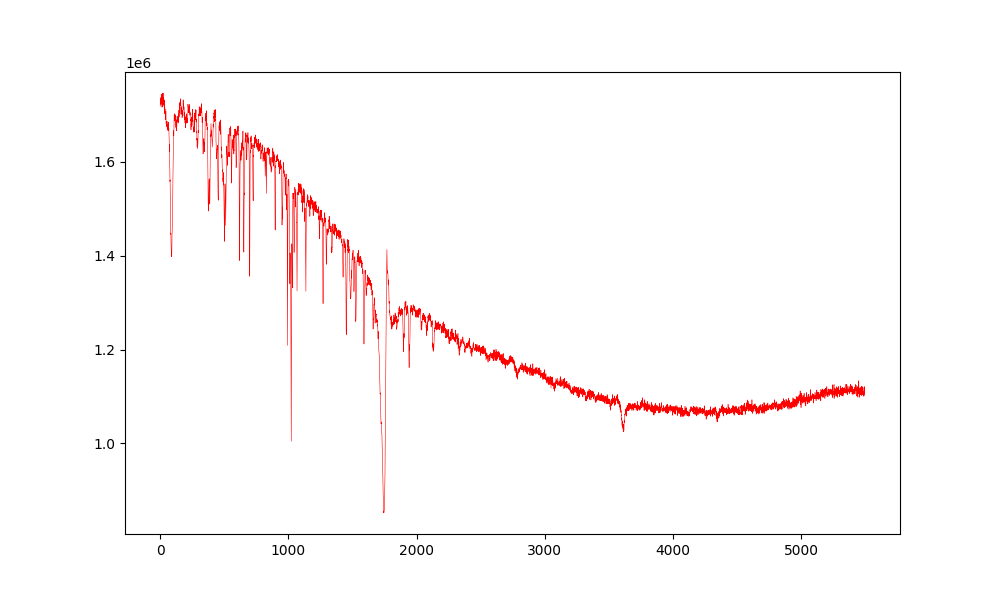

In [35]:
plt.figure(figsize=(10,6))
plt.plot(spectrum.flux, color='r',  linewidth = '0.4')

